# Initial Exploration

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv('data/kc_house_data.csv')
cont = pd.read_csv('data/continuous_df.csv')
cat = pd.read_csv('data/categorical_df.csv')
df_clean = pd.read_csv('data/df_untransformed.csv')

In [2]:
#Use if want to only look at wealthy vs not neighborhoods
#df.groupby('zipcode')['price'].sum().sort_values(ascending = False)

#Want to look at grade in each zipcode
#df.groupby(['grade', 'zipcode'])['id'].count().sort_values(ascending = False)

df_basement = df_clean[df_clean['sqft_basement'] != 0]
df_clean['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [40]:
df_num = df.drop(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode', 'lat', 'long'], axis = 1)

<AxesSubplot:>

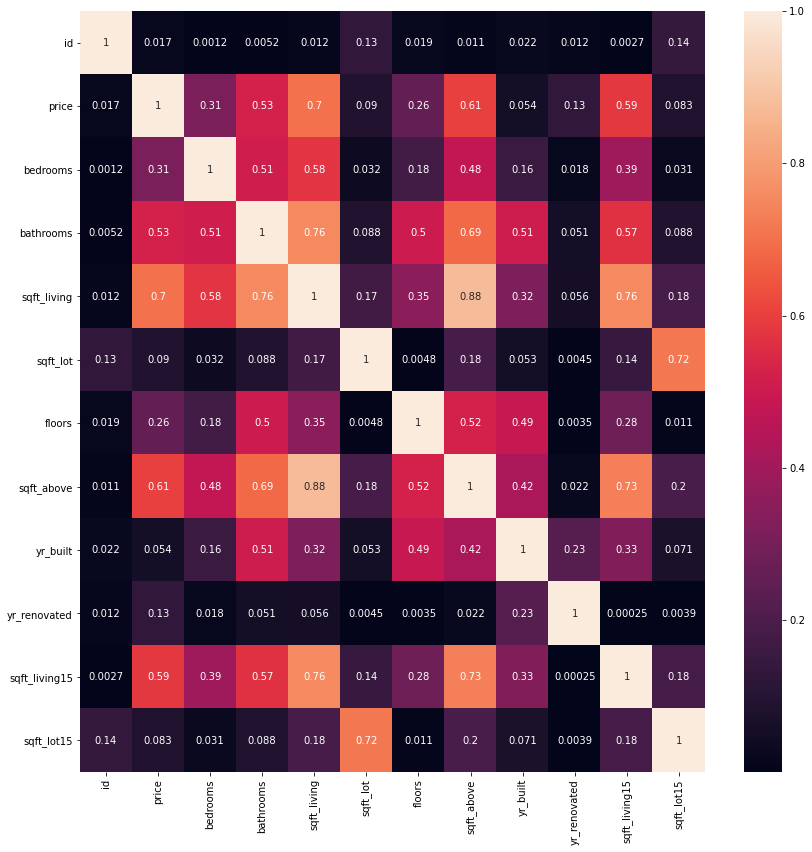

In [41]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_num.corr().abs(), annot = True)

## Test Function

### sklearn version

In [60]:
#Should I add in cross-evaluation for MSE??
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X_train, y_train], axis = 1)
#     sns.pairplot(combine)
#     plt.show()
    
    #Makes model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    #Grabs predictions
    train_predict = linreg.predict(X_train)
    test_predict = linreg.predict(X_test)
    
    #Prints R^2
    print("Train R2: " + str(r2_score(y_train, train_predict)))
    print("Test R2: " + str(r2_score(y_test, test_predict)))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Also untested <3
    #Prints Jarque-Bera value if needed - still normality
    if len(X_train) > 2000:
        jb_test = stats.jarque_bera(X_train)
        print("Training Jarque-Bera value: " + str(jb_test.statistic))
    
    #Test for Heteroskedasticity
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    #Haven't actually tested a return, but should work?
    #return X_train, X_test, y_train, y_test, linreg

### statsmodel version

In [59]:
# NO! train test split - not sure if it works with statsmodel? only ever did it with sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.pairplot(combine)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X)
    linreg_model = sm.OLS(y, X).fit()
    
    #Grabs predictions
    predict = linreg_model.predict(X)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared))
    
    #Prints MSE
    print("Model MSE: " + str(mean_squared_error(y, predict)))
    
    #Creates residuals
    resid = y - predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    plt.scatter(predict, resid)
    plt.axhline(y=0, color = 'red')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.show()
     
    return linreg_model

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def model_maker(X, y, X_cont):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #Scales data
    scalar = StandardScaler()
    X_train[X_cont] = scalar.fit_transform(X_train[X_cont])
    X_test[X_cont] = scalar.transform(X_test[X_cont])
        
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.heatmap(abs(combine.corr()), annot = True)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X_train)
    linreg_model = sm.OLS(y_train, X_train).fit()
    
    #Grabs predictions
    train_predict = linreg_model.predict(X_train)
    test_predict = linreg_model.predict(X_test)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared_adj))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
     
    return linreg_model

# Model Start

In [3]:
final = pd.read_csv('data/master_df')

In [7]:
final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

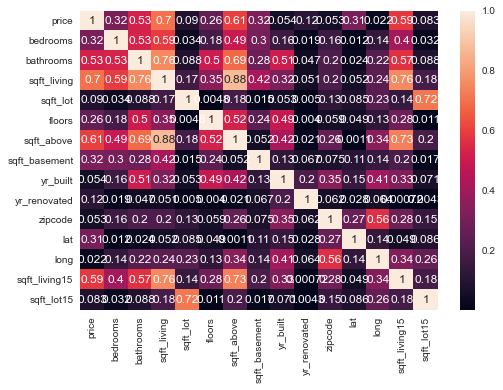

In [10]:
sns.heatmap(final.corr().abs(), annot = True)

In [15]:
final['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21588 entries, 0 to 21587
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  int64  
 4   sqft_lot       21588 non-null  int64  
 5   floors         21588 non-null  float64
 6   view           21588 non-null  object 
 7   condition      21588 non-null  object 
 8   grade          21588 non-null  object 
 9   sqft_above     21588 non-null  int64  
 10  sqft_basement  21588 non-null  float64
 11  yr_built       21588 non-null  int64  
 12  yr_renovated   21588 non-null  float64
 13  zipcode        21588 non-null  int64  
 14  lat            21588 non-null  float64
 15  long           21588 non-null  float64
 16  sqft_living15  21588 non-null  int64  
 17  sqft_lot15     21588 non-null  int64  
dtypes: flo

In [8]:
final.groupby('zipcode')['price'].count().sort_values(ascending = False)

zipcode
98103    600
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: price, Length: 70, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

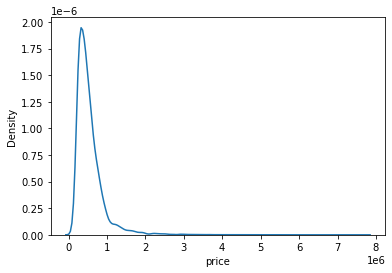

In [10]:
sns.kdeplot(df['price'])

In [11]:
len(final) * .03

647.64

In [3]:
#final_nonlux = final[final.price < np.percentile(final, .97)]

# DataFrame to Work With

In [4]:
quantile97 = final['price'].quantile(.97)
non_luxury_df = final[final['price'] < quantile97]

In [5]:
non_luxury_df['zipcode'].unique()
#https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98040, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [6]:
zipcode_city = {98002 : 'Auburn', 98092 : 'Auburn', 98178: 'Bryn Mawr-Skyway', 98125: 'Seattle', 98028:'Kenmore',
               98136: 'Seattle', 98074: 'Sammamish', 98053: 'Union Hill-Novelty Hill', 98003: 'Federal Way',
               98198: 'Des Moines', 98146: 'White Center', 98038: 'Maple Valley', 98007:'Bellevue', 98115:'Seattle',
               98107:'Seattle', 98126:'Seattle', 98019:'Duvall', 98103:'Seattle', 98133:'Seattle', 98030: 'Kent',
               98119:'Seattle', 98112:'Seattle', 98052:'Redmond', 98027:'Issaquah', 98117:'Seattle', 98058:'Fairwood',
               98001:'Lakeland North', 98056:'Renton', 98166:'Burien', 98023:'Federal Way', 98070:'Vashon',
               98148:'Burien', 98105:'Seattle', 98042:'Covington', 98008:'Belelvue', 98059:'Renton', 98122:'Seattle',
               98144:'Seattle', 98004:'Bellevue', 98005:'Bellevue', 98034:'Kirkland', 98075:'Sammamish',98116:'Seattle',
               98010:'Black Diamond', 98118:'Seattle', 98199:'Seattle', 98040:'Mercer Island', 98032:'Kent',
               98045:'North Bend', 98102:'Seattle', 98077:'Cottage Lake', 98108:'Seattle', 98168:'Tukwila',
               98177:'Shoreline', 98065:'Snoqualmie', 98029:'Issaquah', 98006:'Bellevue', 98109:'Seattle', 98022:'Enumclaw',
               98033:'Kirkland', 98155:'Shoreline', 98024:'Fall City', 98011:'Bothell', 98031:'East Hill-Meridian',
               98106:'Seattle', 98072:'Woodinville', 98188:'SeaTac', 98014:'Carnation', 98055:'Renton', 98039:'Medina'}

non_luxury_df['city'] = non_luxury_df['zipcode']
non_luxury_df['city'] = non_luxury_df['city'].map(zipcode_city)
non_luxury_df.head()
    

<ipython-input-6-0c5c4a516413>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['city'] = non_luxury_df['zipcode']
<ipython-input-6-0c5c4a516413>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['city'] = non_luxury_df['city'].map(zipcode_city)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Bryn Mawr-Skyway
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish


# Bathroom as Cont

<ipython-input-39-1daee510fcd8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_cont] = scalar.fit_transform(X_train[X_cont])
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-39-1daee510fcd8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Model R2: 0.9335622276832535
Train MSE: 19888643248.264664
Test MSE: 19380114196.290375
Test for Normality
Test for Heteroskedasticity


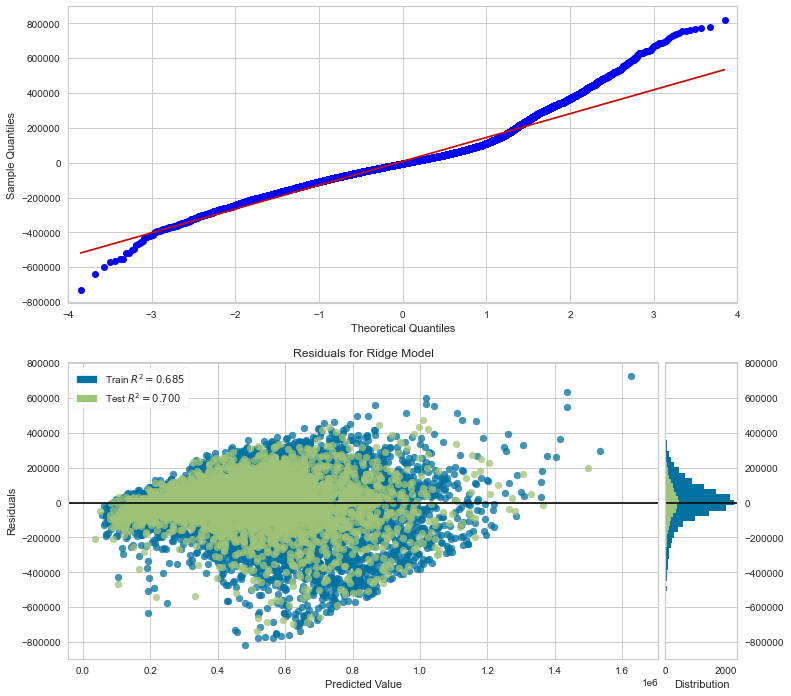

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              6032.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:56:12   Log-Likelihood:                     -2.2223e+05
No. Observations:               16740   AIC:                                  4.445e+05
Df Residuals:                   16701   BIC:                                  4.448e+05
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
city_Belelvue                 5.744e+05   9675.169     59.365      0.000    5.55e+05    5.93e+05
city_Bellevue                 6.812e+05   5150.864    132.251      0.000    6.71e+05    6.91e+05
city_Black Diamond            4.068e+05   1.62e+04     25.115      0.000    3.75e+05    4.39e+05
city_Bothell                  4.483e+05   1.11e+04     40.518      0.000    4.27e+05     4.7e+05
city_Bryn Mawr-Skyway         3.575e+05   1.01e+04     35.565      0.000    3.38e+05    3.77e+05
city_Burien                   4.184e+05   8900.603     47.005      0.000    4.01e+05    4.36e+05
city_Carnation                4.308e+05   1.44e+04     29.891      0.000    4.03e+05    4.59e+05
city_Cottage Lake             5.167e+05   1.12e+04     46.149      0.000    4.95e+05    5.39e+05
city_Covington                3.107e+05   6899.803     45.025      0.000    2.97e+05    3.24e+05
city_Des Moines               3.461e+05   9445.938     36.638      0.000    3.28e+05    3.65e+05
city_Duvall                   3.897e+05   1.18e+04     33.104      0.000    3.67e+05    4.13e+05
city_East Hill-Meridian       3.126e+05   9504.012     32.891      0.000    2.94e+05    3.31e+05
city_Enumclaw                 3.484e+05   9987.466     34.882      0.000    3.29e+05    3.68e+05
city_Fairwood                 3.466e+05   7483.322     46.311      0.000    3.32e+05    3.61e+05
city_Fall City                4.586e+05   1.85e+04     24.733      0.000    4.22e+05    4.95e+05
city_Federal Way              2.984e+05   5675.479     52.570      0.000    2.87e+05    3.09e+05
city_Issaquah                 5.241e+05   5875.595     89.204      0.000    5.13e+05    5.36e+05
city_Kenmore                   4.39e+05   9211.829     47.657      0.000    4.21e+05    4.57e+05
city_Kent                     3.054e+05   8034.047     38.013      0.000     2.9e+05    3.21e+05
city_Kirkland                 5.622e+05   5252.336    107.039      0.000    5.52e+05    5.72e+05
city_Lakeland North            3.01e+05   8485.053     35.474      0.000    2.84e+05    3.18e+05
city_Maple Valley              3.42e+05   6505.650     52.576      0.000    3.29e+05    3.55e+05
city_Medina                   1.089e+06   4.46e+04     24.380      0.000       1e+06    1.18e+06
city_Mercer Island            8.151e+05   1.08e+04     75.433      0.000    7.94e+05    8.36e+05
city_North Bend               4.256e+05   1.09e+04     38.950      0.000    4.04e+05    4.47e+05
city_Redmond                  5.728e+05   6685.941     85.675      0.000     5.6e+05    5.86e+05
city_Renton                   3.979e+05   4678.735     85.051      0.000    3.89e+05    4.07e+05
city_Sammamish                5.609e+05   5713.066     98.173      0.000  

In [40]:
#encode bedrooms
city_df = pd.get_dummies(non_luxury_df['city'], drop_first=True, prefix='city')

X_df = pd.concat([city_df, non_luxury_df[['bathrooms']], non_luxury_df[['sqft_living']]], axis=1)
X_df

y_df = non_luxury_df['price']
y_df

model = model_maker(X_df, y_df, ['bathrooms', 'sqft_living'])
model.summary()